In [ ]:
pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer
import matplotlib.pyplot as plt
import os

In [ ]:
data_path = "/content/drive/MyDrive/data/prog"
wav_path = "/content/drive/MyDrive/data/prog/wavpp/"
hopedata_path ="/content/drive/MyDrive/data/prog/jo.csv"


# Read metadata file and parse it
hopedata_df = pd.read_csv('/content/drive/MyDrive/data/prog/jo.csv', header=None, quoting=2)
hopedata_df.columns = ["normalized_transcription", "file_name",]
hopedata_df = hopedata_df[["normalized_transcription", "file_name"]]
hopedata_df = hopedata_df.sample(frac=1).reset_index(drop=True)
hopedata_df.head(3)

,normalized_transcription,file_name
0,ግን ወደ ኋላው ላይ ኢሳያስ እንደ ልማ ዳቸው ሁሉን ም የ መልከ ፍ ዲፕሎ...,tr_10_tr01010 - Copy (4) - Copy
1,ኦስሪያን በ ሀገሩ አንድ ለ ዜሮ አሸንፎ ሶስት ነጥብ ይ ዟል,tr_15_tr01015 - Copy - Copy - Copy - Copy
2,እውቅና ን ማግኘቴ ለ እኔ ትልቅ ክብር ነው,tr_31_tr01031 - Copy - Copy (2) - Copy


In [ ]:
fdata = 0
alldata = 0
for file in hopedata_df['file_name']:
  alldata = alldata + 1
  path = '/content/drive/MyDrive/data/prog/wavpp/' + file +'.wav'
  if not os.path.exists(path):
    fdata = fdata + 1
    hopedata_df.drop(hopedata_df.index[(hopedata_df["file_name"] == file)],axis=0,inplace=True)

print("from all wav file of : " + str(alldata) + " - " + str(fdata) +" Files not avaliable : ")

from all wav file of : 800 - 0 Files not avaliable : 


In [ ]:
split = int(len(hopedata_df) * 0.90)
df_train = hopedata_df[:split]
df_val = hopedata_df[split:]

print(f"Size of the training set: {len(df_train)}")
print(f"Size of the val set: {len(df_val)}")


Size of the training set: 720
Size of the val set: 80


In [ ]:
# The set of characters accepted in the transcription.
characters = [x for x in "ሀሁሂሃሄህሆለሉሊላሌልሎሏቨቩቪቫቬቭቮቯጨጩጪጫጬጭጮጯሐሑሒሓሔሕሖመሙሚማሜምሞሟሠሡሢሣሤሥሦሰሱሲሳሴስሶሷረሩሪራሬርሮሯሸሹሺሻሼሽሾሿቀቁቂቃቄቅቆቋበቡቢባቤብቦቧተቱቲታቴትቶቷቸቹቺቻቼችቾነኑኒናኔንኖኗኘኙኚኛኜኝኞገጉጊጋጌግጎጐጓደዱዲዳዴድዶዷኀኁኂኃኄኅኆኋጀጁጂጃጄጅጆዘዙዚዛዜዝዞዟዠዡዢዣዤዥዦጠጡጢጣጤጥጦጧጰጱጲጴጵጶጸጹጺጻጼጽጾአኡኢኣኤእኦከኩኪካኬክኮኳወዉዊዋዌውዎዐዑዒዓዔዕዖየዩዪያዬይዮፈፉፊፋፌፍፎፏፐፑፒፓፔፕፖ'?! "]
# Mapping characters to integers
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")
# Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'ሀ', 'ሁ', 'ሂ', 'ሃ', 'ሄ', 'ህ', 'ሆ', 'ለ', 'ሉ', 'ሊ', 'ላ', 'ሌ', 'ል', 'ሎ', 'ሏ', 'ቨ', 'ቩ', 'ቪ', 'ቫ', 'ቬ', 'ቭ', 'ቮ', 'ቯ', 'ጨ', 'ጩ', 'ጪ', 'ጫ', 'ጬ', 'ጭ', 'ጮ', 'ጯ', 'ሐ', 'ሑ', 'ሒ', 'ሓ', 'ሔ', 'ሕ', 'ሖ', 'መ', 'ሙ', 'ሚ', 'ማ', 'ሜ', 'ም', 'ሞ', 'ሟ', 'ሠ', 'ሡ', 'ሢ', 'ሣ', 'ሤ', 'ሥ', 'ሦ', 'ሰ', 'ሱ', 'ሲ', 'ሳ', 'ሴ', 'ስ', 'ሶ', 'ሷ', 'ረ', 'ሩ', 'ሪ', 'ራ', 'ሬ', 'ር', 'ሮ', 'ሯ', 'ሸ', 'ሹ', 'ሺ', 'ሻ', 'ሼ', 'ሽ', 'ሾ', 'ሿ', 'ቀ', 'ቁ', 'ቂ', 'ቃ', 'ቄ', 'ቅ', 'ቆ', 'ቋ', 'በ', 'ቡ', 'ቢ', 'ባ', 'ቤ', 'ብ', 'ቦ', 'ቧ', 'ተ', 'ቱ', 'ቲ', 'ታ', 'ቴ', 'ት', 'ቶ', 'ቷ', 'ቸ', 'ቹ', 'ቺ', 'ቻ', 'ቼ', 'ች', 'ቾ', 'ነ', 'ኑ', 'ኒ', 'ና', 'ኔ', 'ን', 'ኖ', 'ኗ', 'ኘ', 'ኙ', 'ኚ', 'ኛ', 'ኜ', 'ኝ', 'ኞ', 'ገ', 'ጉ', 'ጊ', 'ጋ', 'ጌ', 'ግ', 'ጎ', 'ጐ', 'ጓ', 'ደ', 'ዱ', 'ዲ', 'ዳ', 'ዴ', 'ድ', 'ዶ', 'ዷ', 'ኀ', 'ኁ', 'ኂ', 'ኃ', 'ኄ', 'ኅ', 'ኆ', 'ኋ', 'ጀ', 'ጁ', 'ጂ', 'ጃ', 'ጄ', 'ጅ', 'ጆ', 'ዘ', 'ዙ', 'ዚ', 'ዛ', 'ዜ', 'ዝ', 'ዞ', 'ዟ', 'ዠ', 'ዡ', 'ዢ', 'ዣ', 'ዤ', 'ዥ', 'ዦ', 'ጠ', 'ጡ', 'ጢ', 'ጣ', 'ጤ', 'ጥ', 'ጦ', 'ጧ', 'ጰ', 'ጱ', 'ጲ', 'ጴ', 'ጵ', 'ጶ', 'ጸ', 'ጹ', 'ጺ', 'ጻ', 'ጼ', 'ጽ', 'ጾ', 'አ', 'ኡ', 'ኢ', 'ኣ', '

In [ ]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384


def encode_single_sample(wav_file, label):
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read wav file
    file = tf.io.read_file(wav_path  + wav_file + ".wav" )
    # 2. Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float64)
    # 4. Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    # 6. normalisation
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    ###########################################
    ##  Process the label
    ##########################################
    # 7. Convert label to Lower case
    label = tf.strings.lower(label)
    # 8. Split the label
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    # 9. Map the characters in label to numbers
    label = char_to_num(label)
    # 10. Return a dict as our model is expecting two inputs
    return spectrogram, label


In [ ]:
batch_size = 32
# Define the trainig dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["file_name"]), list(df_train["normalized_transcription"]))
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["file_name"]), list(df_val["normalized_transcription"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4877 (\N{ETHIOPIC SYLLABLE GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4757 (\N{ETHIOPIC SYLLABLE NE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4808 (\N{ETHIOPIC SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4848 (\N{ETHIOPIC SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4747 (\N{ETHIOPIC SYLLABLE XWAA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyt

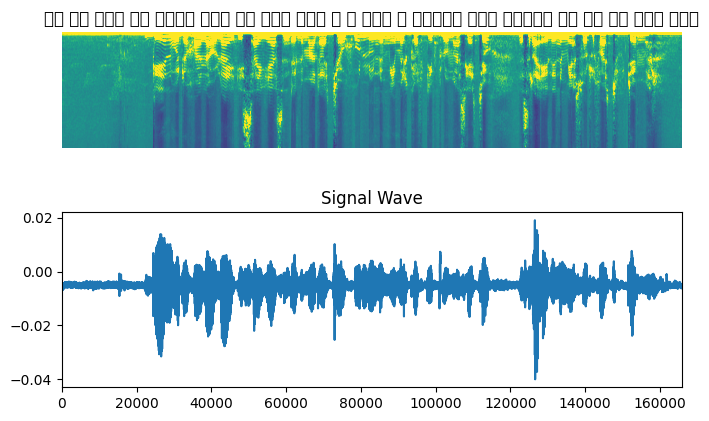

In [ ]:
fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
    spectrogram = batch[0][0].numpy()
    spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
    label = batch[1][0]
    # Spectrogram
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectrogram, vmax=1)
    ax.set_title(label)
    ax.axis("off")
    # Wav
    file = tf.io.read_file(wav_path + list(df_train["file_name"])[0] + ".wav")
    audio, _ = tf.audio.decode_wav(file)
    audio = audio.numpy()
    ax = plt.subplot(2, 1, 2)
    plt.plot(audio)
    ax.set_title("Signal Wave")
    ax.set_xlim(0, len(audio))
    display.display(display.Audio(np.transpose(audio), rate=16000))
plt.show()

In [ ]:

def CTCLoss(y_true, y_pred):
    # Compute the training-time loss value
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss


In [ ]:

def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim), name="input")
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False,
        name="conv_1",
    )(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
        name="conv_2",
    )(x)
    x = layers.BatchNormalization(name="conv_2_bn")(x)
    x = layers.ReLU(name="conv_2_relu")(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    for i in range(1, rnn_layers + 1):
        recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            return_sequences=True,
            reset_after=True,
            name=f"gru_{i}",
        )
        x = layers.Bidirectional(
            recurrent, name=f"bidirectional_{i}", merge_mode="concat"
        )(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
    # Model
    model = keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss=CTCLoss)
    return model


# Get the model
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input (InputLayer)                              [(None, None, 193)]                         0                
                                                                                                              
 expand_dim (Reshape)                            (None, None, 193, 1)                        0                
                                                                                                              
 conv_1 (Conv2D)                                 (None, None, 97, 32)                        14432            
                                                                                                              
 conv_1_bn (BatchNormalization)                  (None, None, 97, 32)                     

In [ ]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    # Iterate over the results and get back the text
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text


# A callback class to output a few transcriptions during training
class CallbackEval(keras.callbacks.Callback):
    """Displays a batch of outputs after every epoch."""

    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch: int, logs=None):
        predictions = []
        targets = []
        for batch in self.dataset:
            X, y = batch
            batch_predictions = model.predict(X)
            batch_predictions = decode_batch_predictions(batch_predictions)
            predictions.extend(batch_predictions)
            for label in y:
                label = (
                    tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                )
                targets.append(label)
        wer_score = wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)
        for i in np.random.randint(0, len(predictions), 2):
            print(f"Target    : {targets[i]}")
            print(f"Prediction: {predictions[i]}")
            print("-" * 100)


In [ ]:
# Define the number of epochs.
epochs =100
# Callback function to check transcription on the val set.
validation_callback = CallbackEval(validation_dataset)
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback],
)


Epoch 1/100
1/1 [==============================] - 3s 3s/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 1.0000
----------------------------------------------------------------------------------------------------
Target    : ኢትዮጵያ ውስጥ የ ነበሩት ኤርትራውያን ም ተመሳሳይ እድል ነበራቸው
Prediction: 
----------------------------------------------------------------------------------------------------
Target    : ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳጀ ች
Prediction: 
----------------------------------------------------------------------------------------------------
23/23 [==============================] - 257s 10s/step - loss: 916.1960 - val_loss: 268.7474
Epoch 2/100
1/1 [==============================] - 1s 642ms/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 1.0000
-------------------------------------------------------------------------------------

KeyboardInterrupt: ignored

In [ ]:




import matplotlib.pyplot as plt

# Train the model and store the history
epochs=100
validation_callback = CallbackEval(validation_dataset)
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs, callbacks=[validation_callback])



import matplotlib.pyplot as plt

def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    # ... existing code ...

    # Compile the model and return
    model.compile(optimizer=opt, loss=CTCLoss)
    return model

# ... existing code ...

# Define a function to compute the WER
def compute_wer(targets, predictions):
    wer_scores = []
    for i in range(len(targets)):
        wer_scores.append(wer(targets[i], predictions[i]))
    return wer_scores

# Define empty lists to store the WER values
train_wer = []
val_wer = []

# Train the model and store the history
for epoch in range(epochs):
    predictions_train = []
    targets_train = []
    for batch in train_dataset:
        X, y = batch
        batch_predictions = model.predict(X)
        batch_predictions = decode_batch_predictions(batch_predictions)
        predictions_train.extend(batch_predictions)
        for label in y:
            label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
            targets_train.append(label)
    wer_train = compute_wer(targets_train, predictions_train)
    train_wer.append(sum(wer_train) / len(wer_train))

    predictions_val = []
    targets_val = []
    for batch in validation_dataset:
        X, y = batch
        batch_predictions = model.predict(X)
        batch_predictions = decode_batch_predictions(batch_predictions)
        predictions_val.extend(batch_predictions)
        for label in y:
            label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
            targets_val.append(label)
    wer_val = compute_wer(targets_val, predictions_val)
    val_wer.append(sum(wer_val) / len(wer_val))

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train WER: {train_wer[-1]:.4f}")
    print(f"Val WER: {val_wer[-1]:.4f}")

# Plot the training and validation WER over epochs
plt.plot(train_wer)
plt.plot(val_wer)
plt.title('Model WER')
plt.ylabel('WER')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
1/1 [==============================] - 3s 3s/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 1.0000
----------------------------------------------------------------------------------------------------
Target    : እውቅና ን መ ጐናጸፍ መጥፎ ጐን እንዳለው በሚገባ ተረድ ቻለሁ
Prediction: 
----------------------------------------------------------------------------------------------------
Target    : መላእክት ያጀቡ ት ህጻን ቦረና ህጻናት ን የሚጠብቁ ና የሚንከባከ ቧቸው መላእክት አሉ ይባላል
Prediction: 
----------------------------------------------------------------------------------------------------
23/23 [==============================] - 322s 12s/step - loss: 988.5402 - val_loss: 285.0227
Epoch 2/100
1/1 [==============================] - 0s 393ms/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 1.0000
-----------------------------------------------------------------------------

In [ ]:
# Let's check results on more validation samples
predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 5):
    print(f"Target    : {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-" * 100)


1/1 [==============================] - 0s 427ms/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 0.0191
----------------------------------------------------------------------------------------------------
Target    : ለማ ን አቤት ማለት እንደሚ ቻል ም ግራ ገብቶ ናል በ ማለት ነጋዴ ዎቹ ብሶ ታቸውን ገልጸዋል
Prediction: ለማ ን አቤት ማለት እንደሚ ቻል ም ግራ ገብቶ ናል በ ማለት ነጋዴ ዎቹ ብሶ ታቸውን ገልጸዋል
----------------------------------------------------------------------------------------------------
Target    : ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያል ተረገጠ ች አገር ኢትዮጵያ ና ት
Prediction: ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያል ተረገጠ ች አገር ኢትዮጵያ ና ት
----------------------------------------------------------------------------------------------------
Target    : በ ኢትዮጵያውያ ን ብቻ ሳን ወሰን የ ኢትዮጵያ ወዳጆች የሆኑ የ ኢትዮጵያ ታሪክ አዋቂዎች ም በ ውጪ የሚገኙ በዚህ ስራ ላይ ተሳታፊ እንዲሆኑ ጥረት አድርገ ናል
Prediction: በ ኢትዮጵያውያ ን ብቻ ሳን ወሰን የ ኢትዮጵያ ወዳጆች የሆኑ የ ኢትዮጵያ ታሪክ አዋቂዎች ም በ ውጪ የሚገኙ በዚህ ስራ ላይ ተሳታፊ እንዲሆኑ